## Business case: 

Predicting the quality of wine with the given features.

## Importing the libraries: 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset:

In [5]:
data=pd.read_csv('wine.csv')

In [6]:
data.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Domain analysis:
 The dataset shows the various chemical compositions of wine and the quality of wine as the target variable based on all the independent features.

## Basic checks: 

In [7]:
data.wine.value_counts() # 3 categories of wine quality hence multi-class classification problem

wine
2    71
1    59
3    48
Name: count, dtype: int64

In [5]:
data.info() # no null values # all are numerical datatype hence no encoding is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
data.describe()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.shape # 178 rows and 14 columns

(178, 14)

In [8]:
data.rename(columns={'Alcohol':'alcohol', 'Malic acid':'m_acid', 'Ash':'ash', 'Alcalinity of ash': 'AOA', 'Magnesium': 'magnesium', 'Total phenols': 'total_phe', 'Flavanoids': 'flavanoids','Nonflavanoid phenols': 'NOP','Color intensity': 'color_intensity', 'Hue': 'hu', 'OD280/OD315 of diluted wines': 'DW', 'Proline': 'proline'}, inplace= True)
data.head()

,wine,alcohol,m_acid,ash,AOA,magnesium,total_phe,flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA 

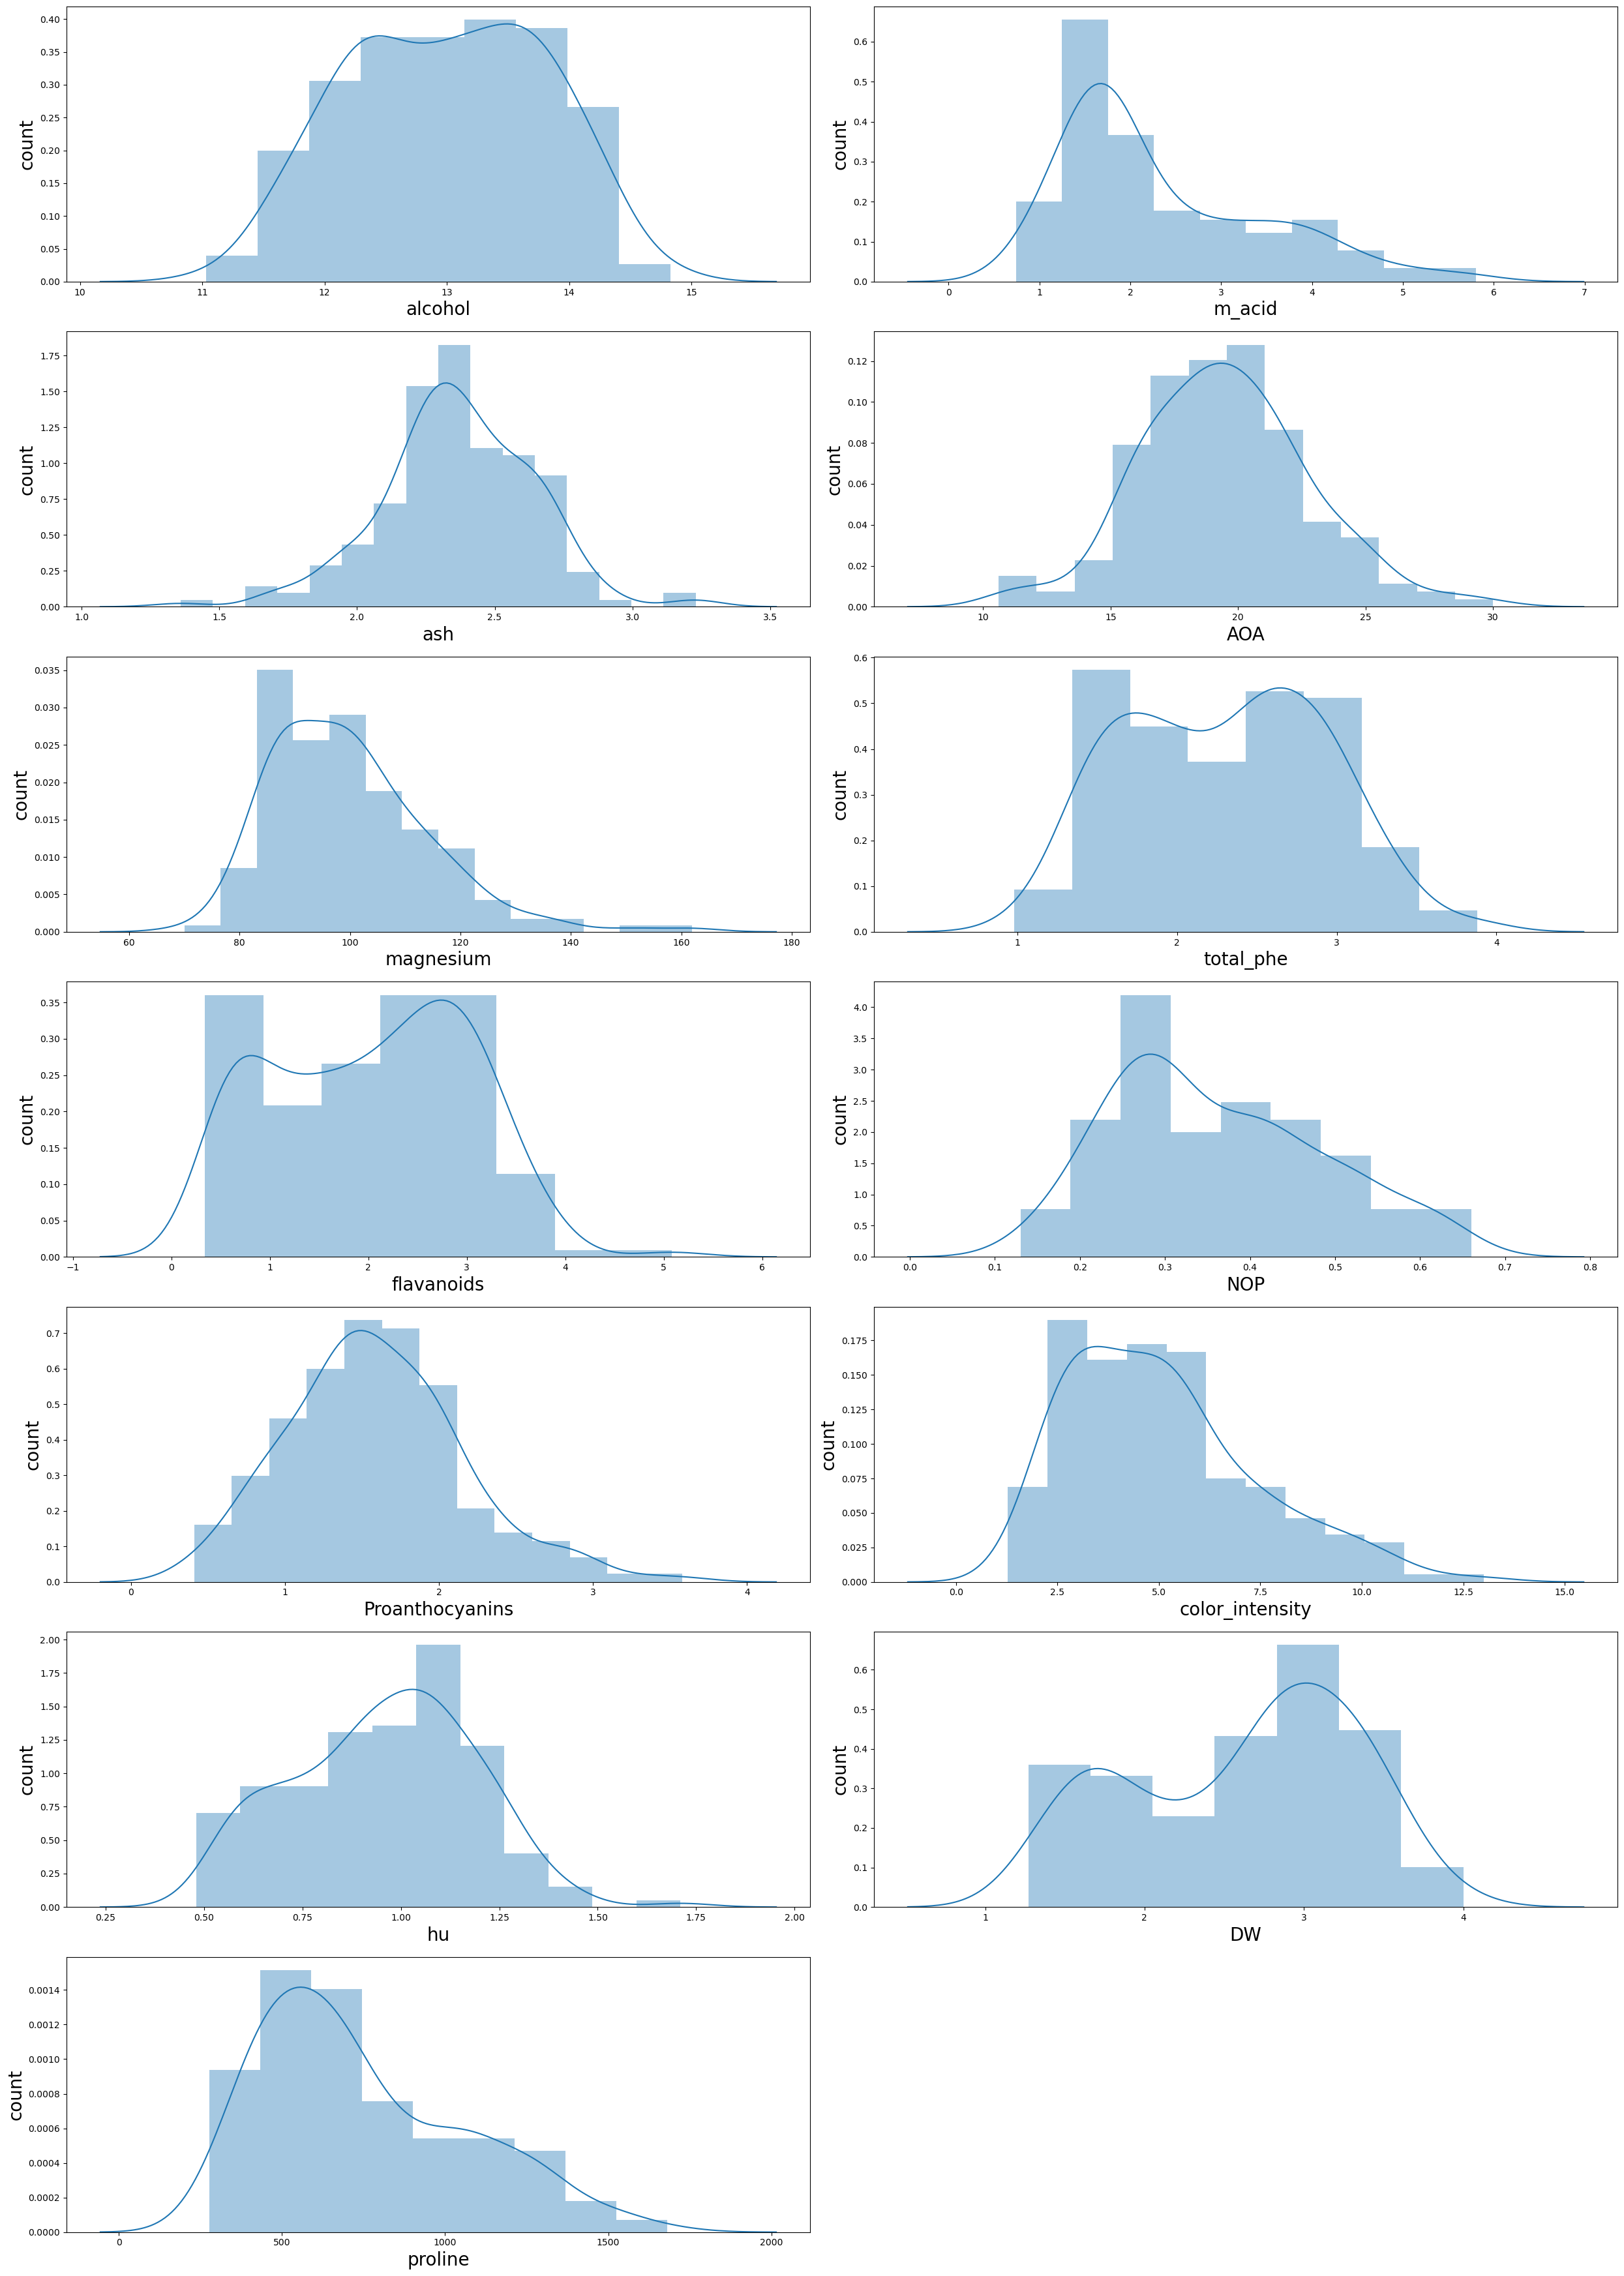

In [9]:
plt.figure(figsize=(25,35), facecolor = 'white')
plotnumber = 1

for column in data.drop('wine', axis =1):
    if (plotnumber <14):
        ax= plt.subplot(7, 2, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize =20)
        plt.ylabel('count', fontsize = 20)
    plotnumber +=1
plt.tight_layout()

## Data preprocessing:


### Checking null values: 

In [10]:
data.isnull().sum()

wine               0
alcohol            0
m_acid             0
ash                0
AOA                0
magnesium          0
total_phe          0
flavanoids         0
NOP                0
Proanthocyanins    0
color_intensity    0
hu                 0
DW                 0
proline            0
dtype: int64

### checking for duplicate records: 

In [11]:
data.duplicated().sum()

0

### checking for categorical columns: 

In [9]:
for column in data.columns:
    if data[column].dtype=='object':
        print(column)
    

###  handling outliers:

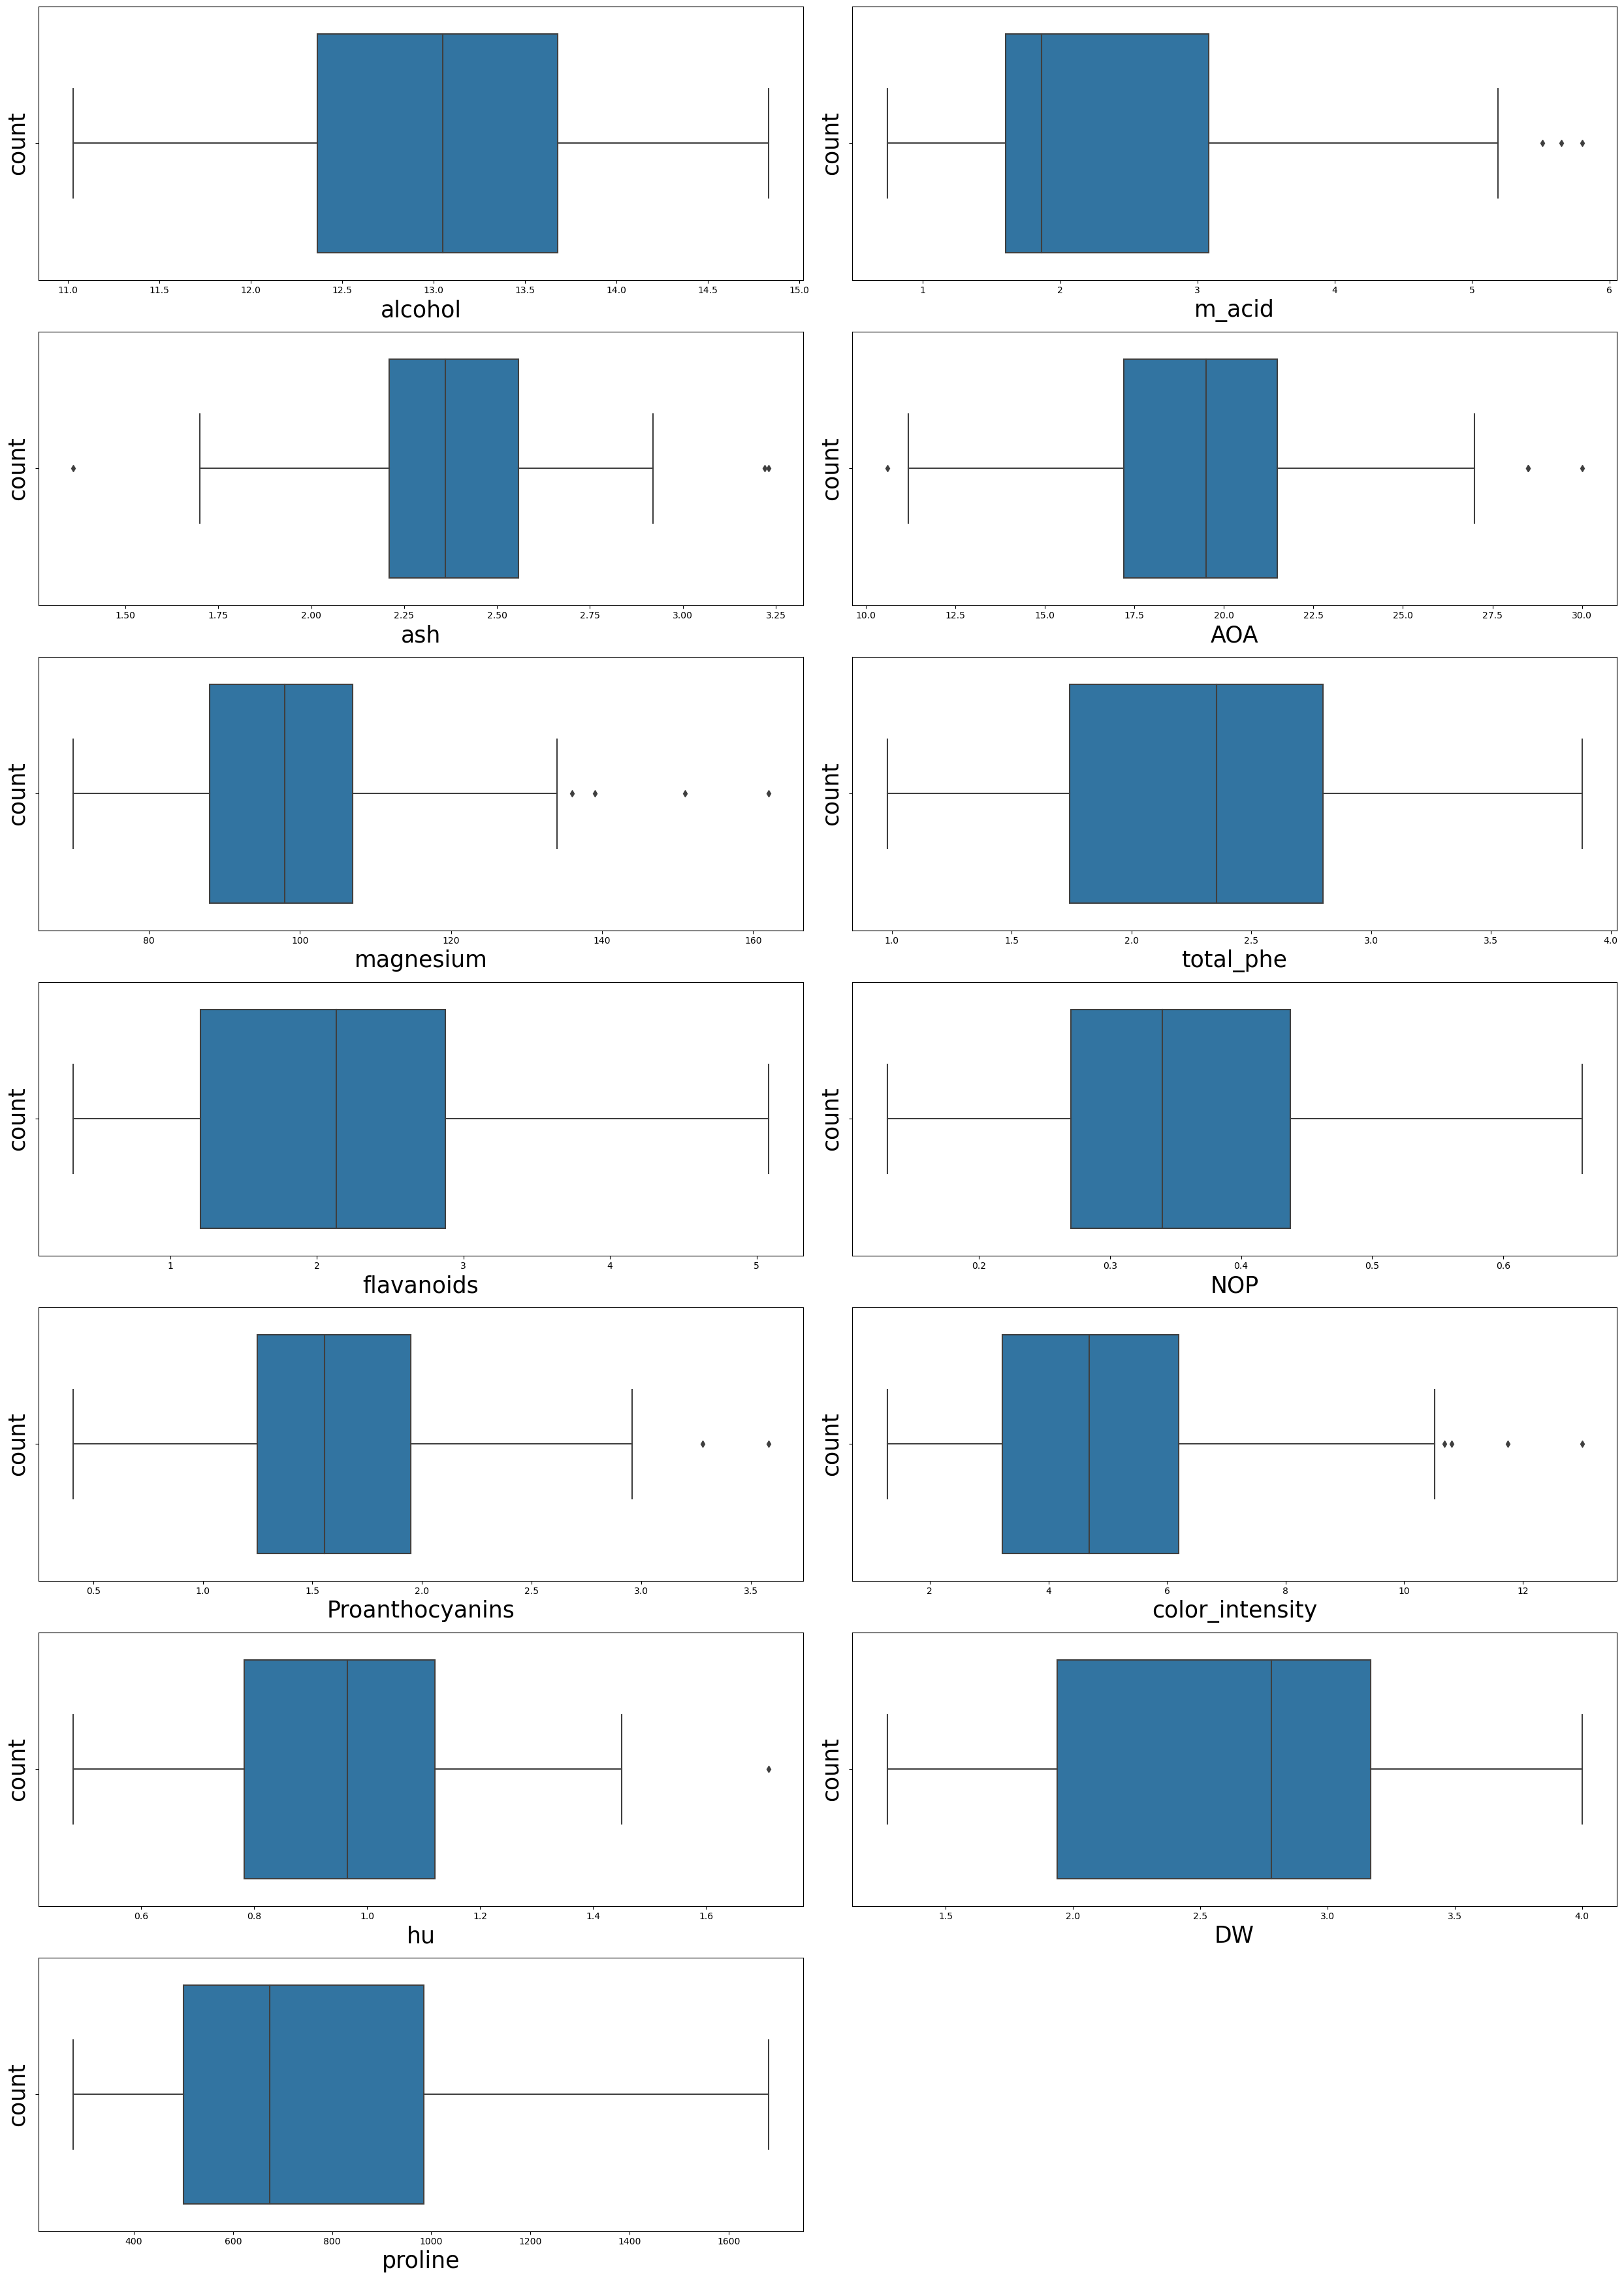

In [13]:
plt.figure(figsize=(25,35), facecolor = 'white')
plotnum = 1

for column in data.drop('wine', axis =1):
    if (plotnum <14):
        ax= plt.subplot(7, 2, plotnum)
        sns.boxplot(data = data, x= column)
        plt.xlabel(column, fontsize =25)
        plt.ylabel('count', fontsize = 25)
    plotnum +=1
plt.tight_layout()

In [14]:
# columns with outliers- malic acid, ash, alcalinity of ash, magnesium, proanthocyanins, color_intensity, hu
# columns without outliers- alcohol, total_phe, flavanoids, NOP, DW, proline

In [15]:
# Finding overall sum and percentage of outliers in the dataset

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

min_limit = q1 -1.5*iqr
max_limit = q3 + 1.5*iqr

# sum of outliers
outliers_count = ((data > max_limit) | (data < min_limit)).sum()

# percentage of outliers
outliers_percentage = (outliers_count/len(data))*100

print('sum of outliers:\n',outliers_count)
print('Percentage of outliers:\n', outliers_percentage)

sum of outliers:
 wine               0
alcohol            0
m_acid             3
ash                3
AOA                4
magnesium          4
total_phe          0
flavanoids         0
NOP                0
Proanthocyanins    2
color_intensity    4
hu                 1
DW                 0
proline            0
dtype: int64
Percentage of outliers:
 wine               0.000000
alcohol            0.000000
m_acid             1.685393
ash                1.685393
AOA                2.247191
magnesium          2.247191
total_phe          0.000000
flavanoids         0.000000
NOP                0.000000
Proanthocyanins    1.123596
color_intensity    2.247191
hu                 0.561798
DW                 0.000000
proline            0.000000
dtype: float64


In [16]:
# malic acid- skewed distribution
# hence iqr method

q1= np.percentile(data['m_acid'], 25)
q3= np.percentile(data['m_acid'], 75)

iqr= q3 -q1
max_limit = q3 + 1.5*iqr
min_limit = q1 - 1.5*iqr

data.loc[(data['m_acid'] > max_limit)|(data['m_acid']< min_limit),'m_acid'] = np.median(data['m_acid'])

In [17]:
# ash- nearly normal distribution- can use emphirical rule.
mean = data['ash'].mean()
std = data['ash'].std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)

lower limit is 1.5434848267501402
upper limit is 3.1895488811150288


In [18]:
data.loc[(data['ash'] < lower_lim)|(data['ash'] > upper_lim),'ash'] = np.mean(data['ash'])

In [19]:
#AOA
data.sort_values('AOA') # sorts the values so that we can find the minimum and maximum limit of the values

,wine,alcohol,m_acid,ash,AOA,magnesium,total_phe,flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,proline
59,2,12.37,0.94,2.366517,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
1,1,13.20,1.78,2.140000,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13,1,14.75,1.73,2.390000,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,1,14.38,1.87,2.380000,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
50,1,13.05,1.73,2.040000,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,12.42,4.43,2.730000,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
157,3,12.45,3.03,2.640000,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
121,2,11.56,2.05,2.366517,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.780000,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [20]:
# AOA- normal distribution

mean = data['AOA'].mean()
std = data['AOA'].std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)

lower limit is 9.476252518704204
upper limit is 29.513635121745235


In [21]:
data.loc[(data['AOA'] < lower_lim)|(data['AOA'] > upper_lim),'AOA'] = np.mean(data['AOA'])

In [22]:
# Magnesium - skewed distribution

q1= np.percentile(data['magnesium'], 25)
q3= np.percentile(data['magnesium'], 75)

iqr= q3 -q1
max_limit = q3 + 1.5*iqr
min_limit = q1 - 1.5*iqr

data.loc[(data['magnesium'] > max_limit)|(data['magnesium']< min_limit),'magnesium'] = np.median(data['magnesium'])

In [23]:
# Proanthocyanins

q1= np.percentile(data['Proanthocyanins'], 25)
q3= np.percentile(data['Proanthocyanins'], 75)

iqr= q3 -q1
max_limit = q3 + 1.5*iqr
min_limit = q1 - 1.5*iqr

data.loc[(data['Proanthocyanins'] > max_limit)|(data['Proanthocyanins']< min_limit),'Proanthocyanins'] = np.median(data['Proanthocyanins'])

In [24]:
# color_intensity
q1= np.percentile(data['color_intensity'], 25)
q3= np.percentile(data['color_intensity'], 75)

iqr= q3 -q1
max_limit = q3 + 1.5*iqr
min_limit = q1 - 1.5*iqr

data.loc[(data['color_intensity'] > max_limit)|(data['color_intensity']< min_limit),'color_intensity'] = np.median(data['color_intensity'])


In [25]:
# hue

q1= np.percentile(data['hu'], 25)
q3= np.percentile(data['hu'], 75)

iqr= q3 -q1
max_limit = q3 + 1.5*iqr
min_limit = q1 - 1.5*iqr

data.loc[(data['hu'] > max_limit)|(data['hu']< min_limit),'hu'] = np.median(data['hu'])


In [26]:
# checking the boxplots of all the features after outliers handling:

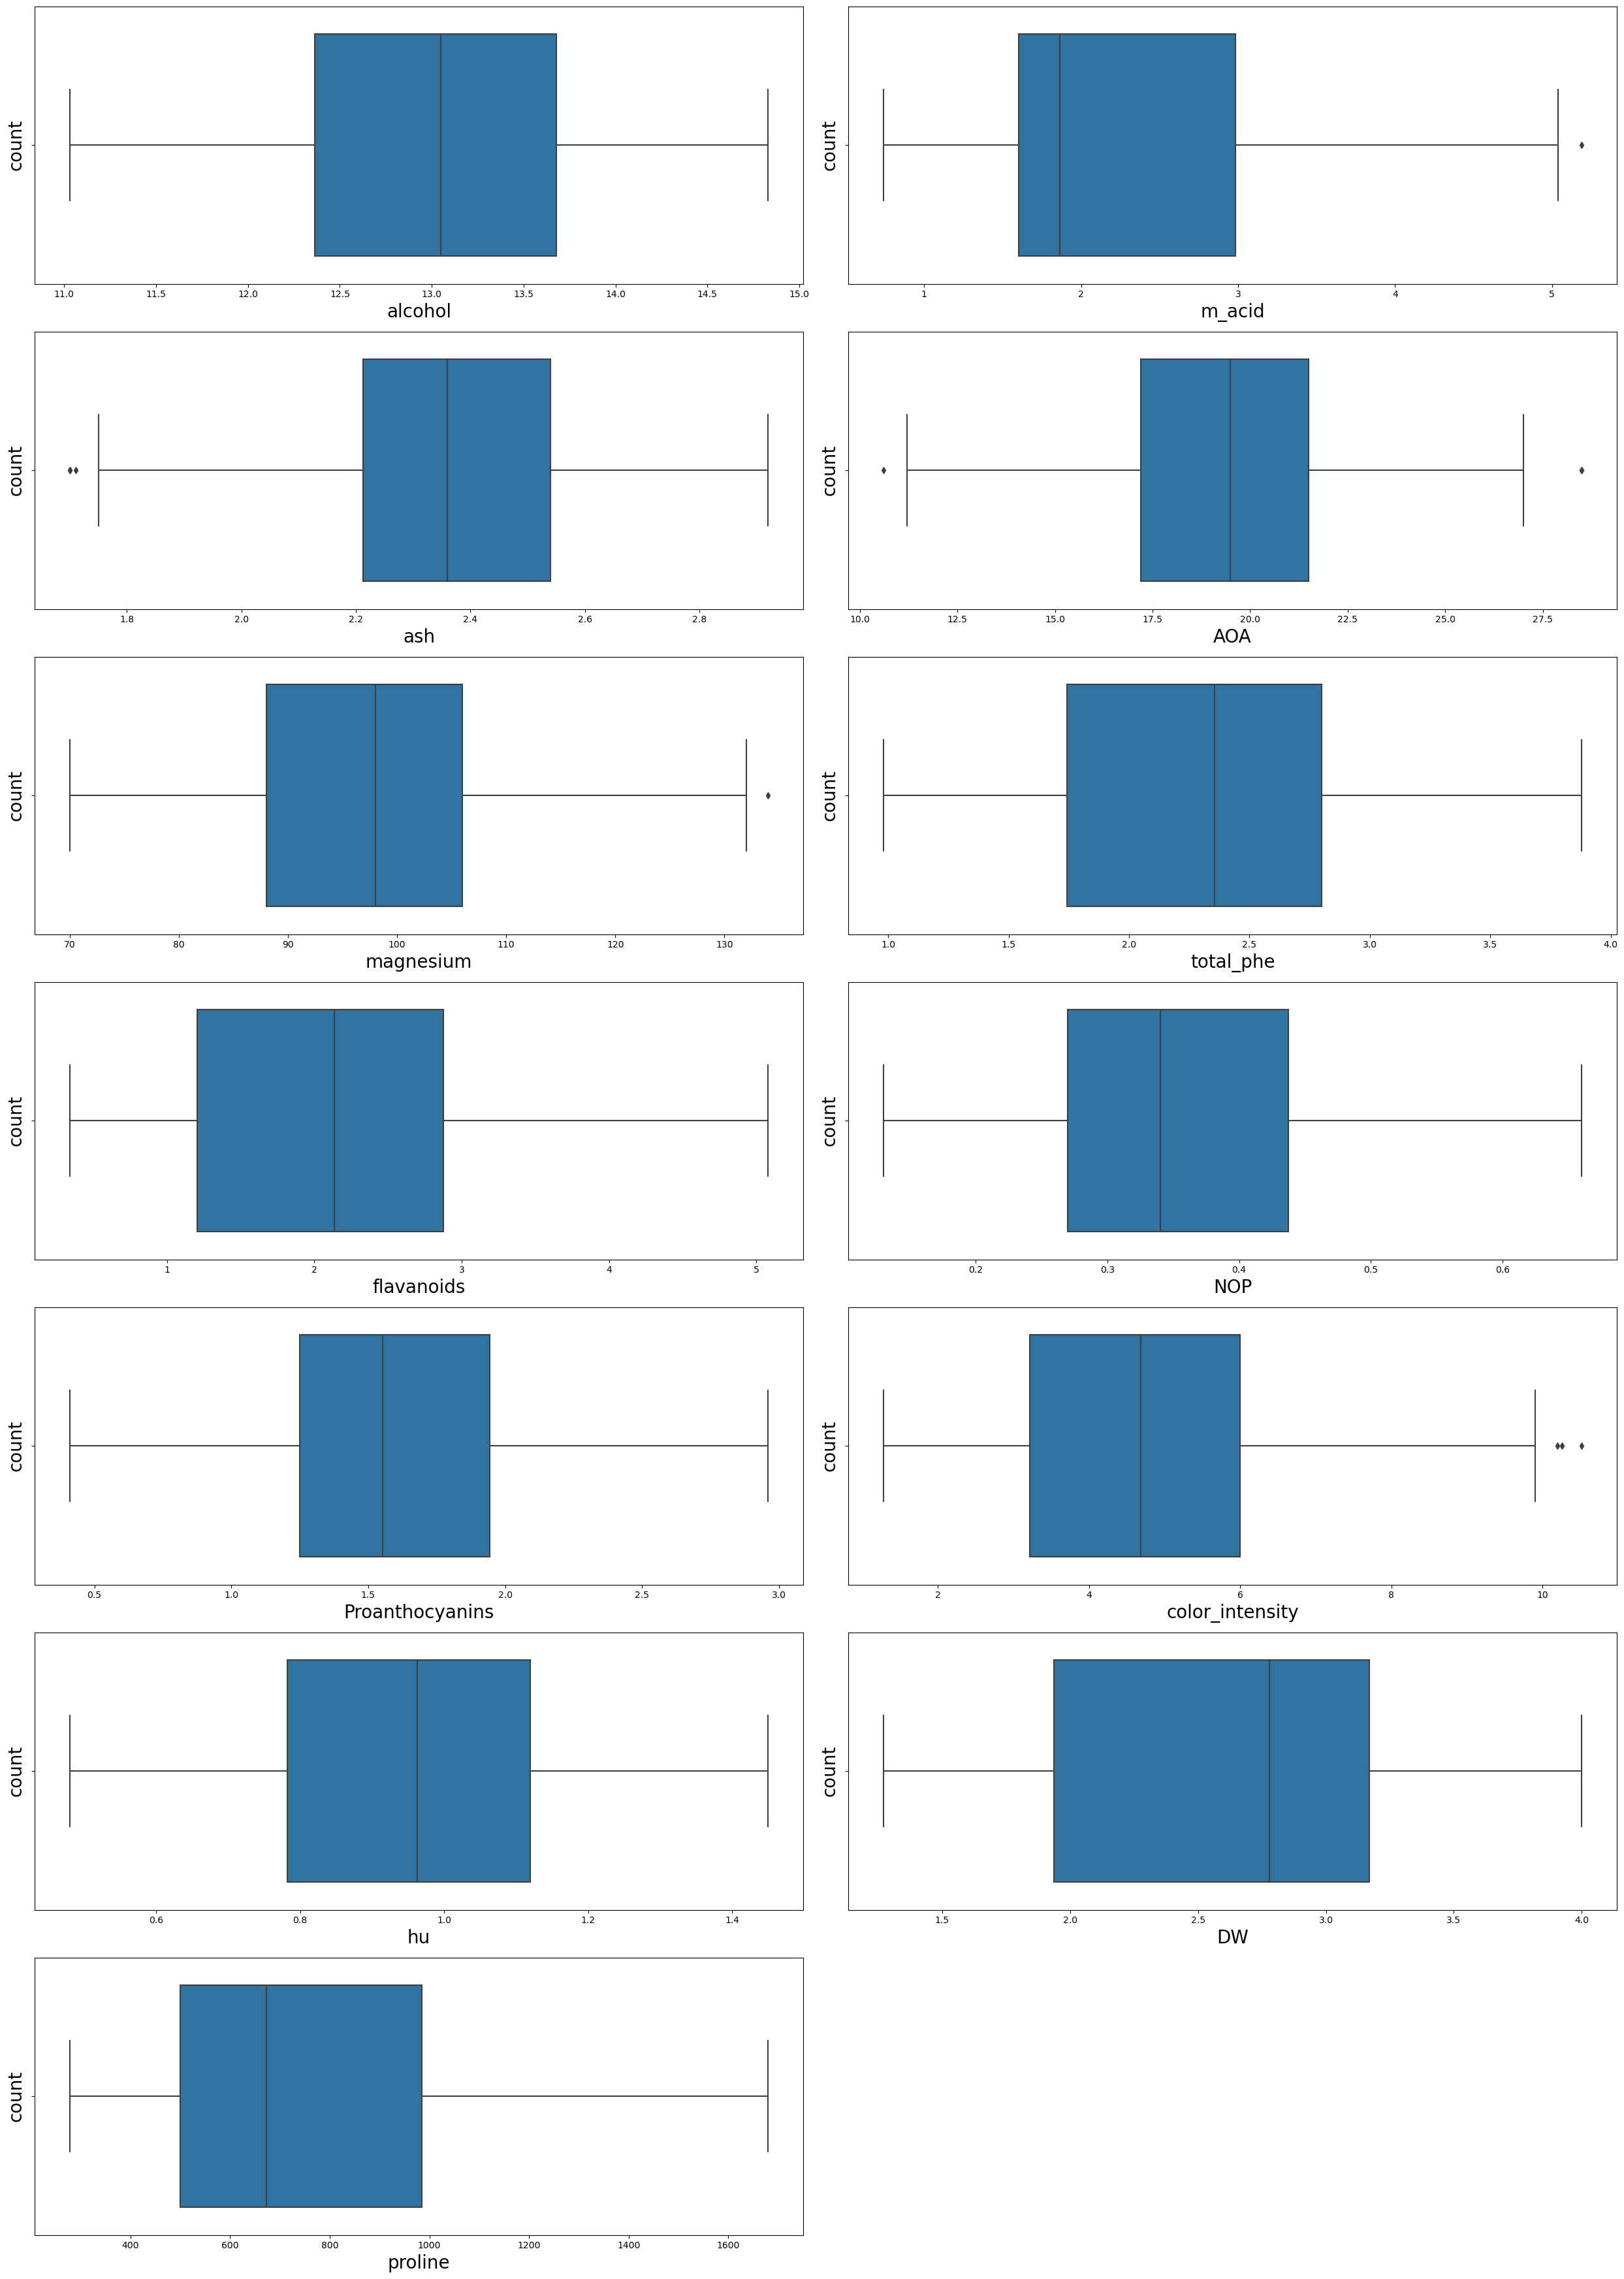

In [27]:
plt.figure(figsize=(25, 35), facecolor= 'white')
plotnumber= 1

for column in data.drop('wine', axis= 1):
    if plotnumber <14:
        ax= plt.subplot(7, 2, plotnumber)
        sns.boxplot(data= data, x= column)
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('count', fontsize =20)
    plotnumber +=1
plt.tight_layout()

## scaling: 

In [28]:
data.columns

Index(['wine', 'alcohol', 'm_acid', 'ash', 'AOA', 'magnesium', 'total_phe',
       'flavanoids', 'NOP', 'Proanthocyanins', 'color_intensity', 'hu', 'DW',
       'proline'],
      dtype='object')

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['alcohol', 'm_acid', 'ash', 'AOA', 'magnesium', 'total_phe',
       'flavanoids', 'NOP', 'Proanthocyanins', 'color_intensity', 'hu', 'DW',
       'proline']] = scaler.fit_transform(data[['alcohol', 'm_acid', 'ash', 'AOA', 'magnesium', 'total_phe',
       'flavanoids', 'NOP', 'Proanthocyanins', 'color_intensity', 'hu', 'DW',
       'proline']])

In [30]:
data.head()

,wine,alcohol,m_acid,ash,AOA,magnesium,total_phe,flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,proline
0,1,0.842105,0.217978,0.598361,0.279330,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341
1,1,0.571053,0.233708,0.360656,0.033520,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642
2,1,0.560526,0.364045,0.795082,0.446927,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933
3,1,0.878947,0.271910,0.655738,0.346369,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347
4,1,0.581579,0.415730,0.959016,0.581006,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963


## feature selection: 

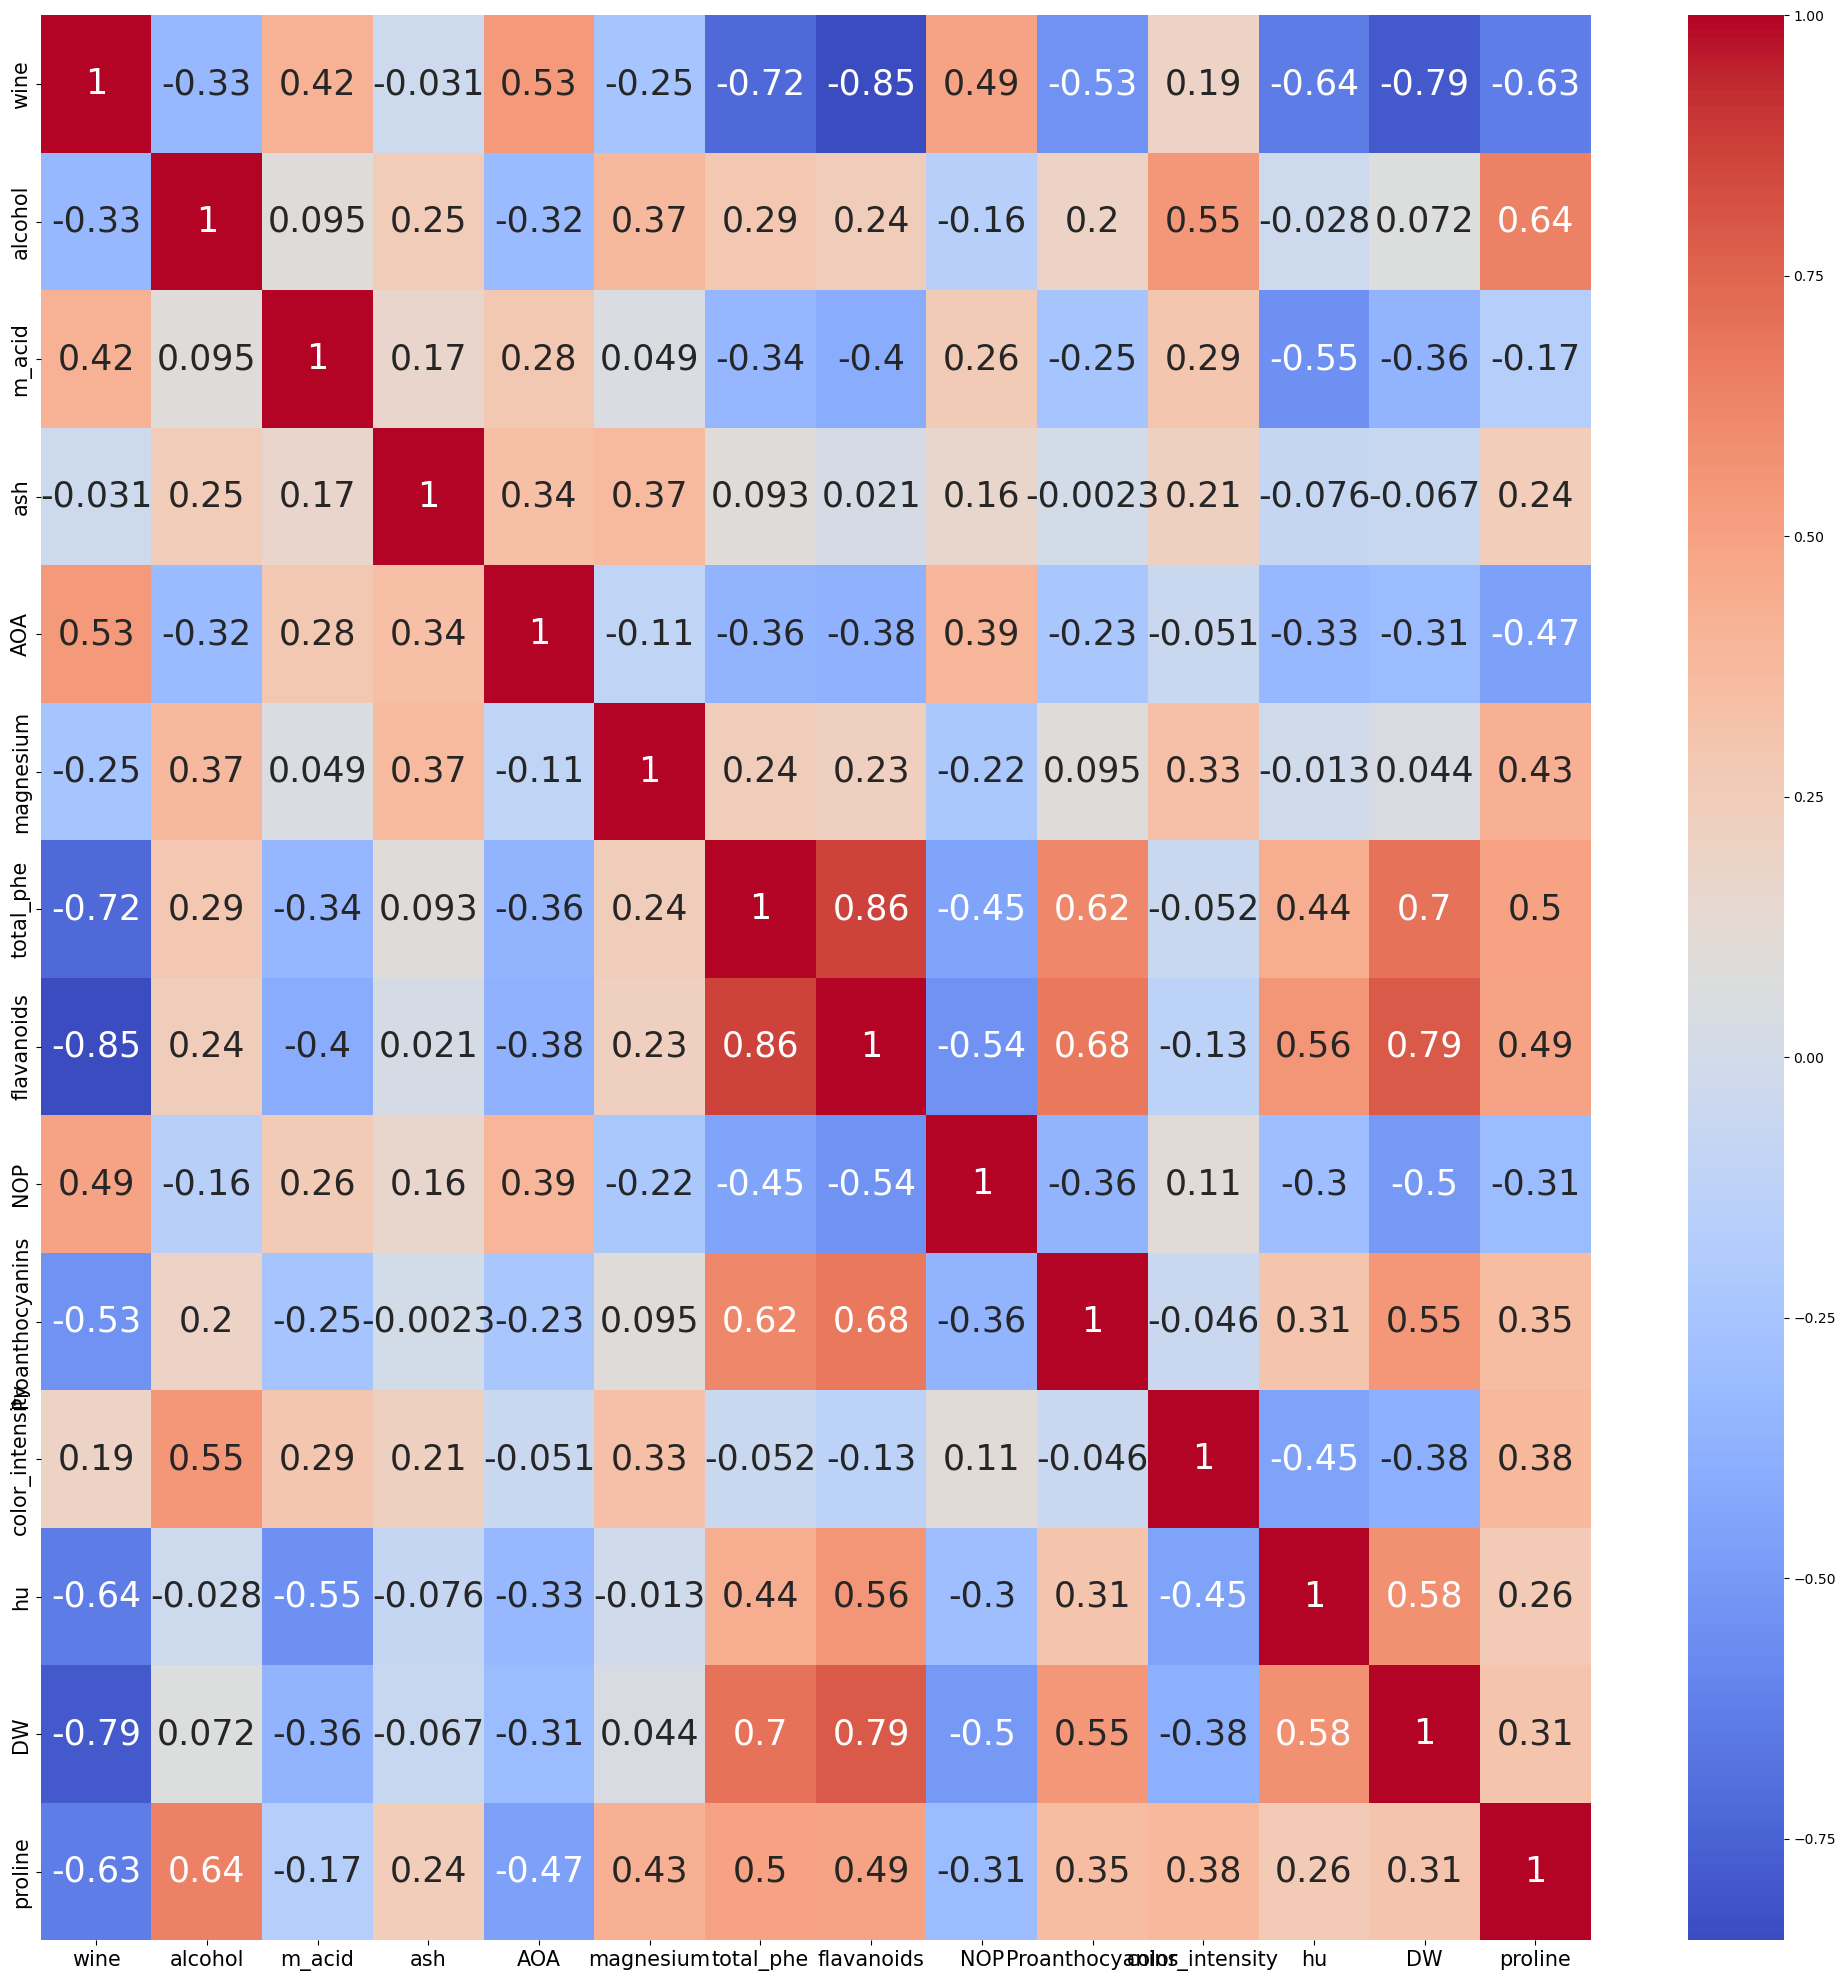

In [31]:
plt.figure(figsize= (25, 25))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', annot_kws= {'size':25})
plt.xticks(fontsize= 15)
plt.yticks(fontsize=15)
plt.show()  #nothing shows above 0.9 or below -0.9, hence no feature is dropped.

## Model implementation: 

### splitting the data 

In [59]:
X = data.drop('wine', axis =1)
y =data['wine']

In [60]:
# model initialisation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X, y, random_state= 42)

#### Balancing the dataset 

In [61]:
# balancing the dataset
from imblearn.over_sampling import SMOTE

smote= SMOTE()
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train) 

In [62]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({2: 53, 1: 44, 3: 36})
Counter({1: 53, 2: 53, 3: 53})


####  Trying with different classification algorithms

#### KNN 

In [36]:
# trying with different models
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN1 = KNeighborsClassifier()
KNN1.fit(x_train_sm, y_train_sm)

KNeighborsClassifier()

In [37]:
#prediction
y_pred_knn = KNN1.predict(x_test)

In [38]:
#evaluation
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
f1_knn = f1_score(y_test, y_pred_knn, average = 'weighted') # multi-class classification hence average = 'weighted' 
# is given in f1 score
f1_knn

0.9323708549515001

#### Logistic regression 

In [39]:
# can try with various classification algorithms and find out the accuracy

#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(x_train_sm, y_train_sm)


LogisticRegression()

In [40]:
# prediction and evaluation
y_pred_lg= model_lg.predict(x_test)
accuracy_score(y_test, y_pred_lg)

1.0

In [41]:
confusion_matrix(y_test, y_pred_lg)

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [43]:
f1_score(y_test, y_pred_lg, average= 'weighted')

1.0

In [44]:
# training accuracy
y_train_acc_lg = model_lg.predict(x_train_sm)
accuracy_score(y_train_sm, y_train_acc_lg)

0.9811320754716981

#### SVC 

In [45]:
#SVC

from sklearn.svm import SVC
model_svc = SVC(kernel='linear') 

model_svc.fit(x_train_sm,y_train_sm)

SVC(kernel='linear')

In [46]:
# prediction and evaluation
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

1.0

In [47]:
f1_score(y_test, y_pred_svc, average ='weighted')

1.0

In [48]:
confusion_matrix(y_test, y_pred_svc)

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [50]:
# training accuracy
y_train_acc_svc= model_svc.predict(x_train_sm)
accuracy_score(y_train_sm, y_train_acc_svc)

0.9811320754716981

### Bagging 

In [51]:
from sklearn.ensemble import BaggingClassifier

model_bagg1= BaggingClassifier(base_estimator=KNN1, n_estimators=300)
#base learner here is KNN (already we have intialized 'KNN1')
#no of base models = n_estimators

# here hyperparamters tuning is not very much required since not that much parameters are used in this model.
model_bagg1.fit(x_train_sm, y_train_sm)


BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=300)

In [52]:
# prediction
y_pred_bagg = model_bagg1.predict(x_test)

In [53]:
# evaluation

f1_bagg= f1_score(y_test, y_pred_bagg, average= 'weighted')
# the weighted average f1 score is calculated by taking the mean of all 
# per-class f1 scores while considering each class's support 
# for multi-class classification, weighted average is taken.

In [54]:
f1_bagg

0.9323708549515001

In [55]:
accuracy_score(y_test, y_pred_bagg)

0.9333333333333333

In [56]:
confusion_matrix(y_test,y_pred_bagg)

array([[15,  0,  0],
       [ 1, 15,  2],
       [ 0,  0, 12]], dtype=int64)

In [57]:
#training accuracy
y_train_acc_bagg= model_bagg1.predict(x_train_sm)
accuracy_score(y_train_sm,y_train_acc_bagg)

0.9685534591194969

#### Balanced Bagging Classifier
- is an ensemble method that combines multiple classifiers, which makes it more robust and less prone to overfitting.
- It uses resampling techniques to balance the class distribution, which can improve the performance of the classifiers.
- It is flexible and can be used with any type of base classifier, which allows for a wide range of applications.
- It can handle both binary and multiclass classification problems.
#### However, Balance Bagging Classifier also has some limitations. 
- One limitation is that it requires a sufficient number of minority class samples to be effective. If the number of minority class samples is too small, the resampling techniques may not be able to generate enough diverse samples to train the classifiers.

Compared to the other techniques , Balance Bagging Classifier is generally more effective in dealing with severe class imbalance, where the minority class is significantly smaller than the majority class. It can also handle datasets with a large number of features and instances.
 

In [63]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()

bbc_model = BalancedBaggingClassifier(base_estimator= model_dt, sampling_strategy= 'auto', replacement = False, random_state= 42)
bbc_model.fit(x_train, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=42)

In [67]:
# prediction and evaluation
y_pred_bbc= bbc_model.predict(x_test)
accuracy_score(y_test, y_pred_bbc)

0.9333333333333333

In [69]:
f1_bbc= f1_score(y_test, y_pred_bbc, average= 'weighted')
f1_bbc

0.9300994421537715